tagesVersion 1.0.3

See solutions by others
https://github.com/legolas140/competitive-data-science-1/tree/master/assignment1
https://github.com/Brandon-HY-Lin/coursera_How-to-Win-a-Data-Science-Competition-Learn-from-Top-Kagglers

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
print(shops.shape)
shops.head()

(60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [5]:
print(transactions.shape)
transactions.head()

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [8]:
trans = transactions[transactions['date'].str.endswith('09.2014')]
max_revenue = (trans['item_price'] * trans['item_cnt_day']).groupby(trans['shop_id']).sum().max()
max_revenue

7982852.199999956

In [9]:
# add revenue and datetime
ta=transactions
ta['datetime'] = pd.to_datetime(ta['date'], dayfirst=True)
ta['revenue'] = ta['item_price']*ta['item_cnt_day']
ta.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime,revenue
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02,999.00
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15,1099.00


In [10]:
# select September 2014
mask_month = ta['datetime'].dt.month==9
mask_year = ta['datetime'].dt.year==2014
ta2 = ta.loc[mask_month & mask_year].groupby('shop_id').sum().sort_values(by='revenue',ascending=False)
ta2.head()

,date_block_num,item_id,item_price,item_cnt_day,revenue
shop_id,,,,,
31,118940,66324344,4.719731e+06,8583.0,7.982852e+06
25,79960,43051575,3.733736e+06,6158.0,6.783338e+06
12,16840,8394533,1.445270e+06,3400.0,6.378335e+06
28,62860,32961134,3.500124e+06,4403.0,4.985847e+06
27,53440,25365729,3.166332e+06,4026.0,4.899292e+06


In [11]:
max_revenue = ta2['revenue'].max()
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [12]:
# add item categories to transactions
all(items.index == items['item_id'])
categories =  items.loc[ta['item_id'], 'item_category_id'].values
print(categories)
ta['item_cat'] = categories
ta.head()

[37 58 58 ... 55 57 55]


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime,revenue,item_cat
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02,999.00,37
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03,899.00,58
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05,-899.00,58
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06,1709.05,58
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15,1099.00,56


In [13]:
# find summer time
summer_beg = pd.to_datetime('20140601', format='%Y%m%d')
summer_end = pd.to_datetime('20140901', format='%Y%m%d')
mask_summer = np.logical_and(summer_beg <=ta['datetime'], ta['datetime'] <summer_end)
ta3 = ta.loc[mask_summer].groupby('item_cat').sum().sort_values(by='revenue', ascending=False)
ta3.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue
item_cat,,,,,,
20,139629,244289,51093364,2.031695e+07,12513.0,32157302.43
12,22660,40755,9143056,2.600355e+07,1506.0,31385229.70
19,305348,545363,90148474,2.389013e+07,18682.0,26237112.15
23,243420,460518,60449552,1.854052e+07,14677.0,19896624.03
30,516068,933905,178772507,1.302367e+07,34243.0,15876623.34


In [24]:
index = ta3['revenue'].argmax()
print(index)
category_id_with_max_revenue = ta3.index[index]
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

0
Current answer for task category_id_with_max_revenue is: 20



# 3. How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?

* Let's assume, that the items are returned for the same price as they had been sold.

In [15]:
# check calculating the variance
ta4 = ta.groupby('item_id').std()
ta4.head()

,date_block_num,shop_id,item_price,item_cnt_day,revenue,item_cat
item_id,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN
1,2.529822,0.0,0.000000,0.0,0.000000,0.0
2,2.121320,0.0,0.000000,0.0,0.000000,0.0
3,0.707107,0.0,29.698485,0.0,29.698485,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
num_items_constant_price = np.sum(ta4['item_price']==0) + np.sum(ta4['item_price'].isna())
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [17]:
# add day column
ta['day'] = ta['datetime'].dt.day
ta.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime,revenue,item_cat,day
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02,999.00,37,2
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03,899.00,58,3
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05,-899.00,58,5
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06,1709.05,58,6
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15,1099.00,56,15


In [18]:
# determine items that were later returned
# mask_returned = ta['revenue'] < 0
# item_ids_returned = ta.loc[mask_returned, 'item_id'].unique().tolist()
# item_ids = ta['item_id'].unique().tolist()
# print("{}/{} items were returned".format(len(item_ids_returned),len(item_ids)))
# mask_returned = ta['item_id'].isin(item_ids_returned)
# print("{}/{} rows correspond to returned items".format(sum(mask_returned), len(mask_returned)))

In [19]:
# filter by shop and time in year
mask_shop = ta['shop_id']==25
mask_month = ta['datetime'].dt.month==12
mask_year = ta['datetime'].dt.year==2014
ta5 = ta.loc[mask_shop & mask_month & mask_year,:].groupby('day').sum()
ta5.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,item_cat
day,,,,,,,
1,2829,3075,1242306,184735.166667,153.0,209894.0,5100
2,2645,2875,1102409,133824.000000,169.0,213936.0,4867
3,3473,3775,1633215,174046.783333,195.0,232803.0,6142
4,2944,3200,1341594,202249.666667,164.0,279488.0,5104
5,5221,5675,2451915,301296.066667,300.0,410842.0,9760


In [ ]:
days = ta5.index
total_num_items_sold = ta5['item_cnt_day']

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(total_num_items_sold, ddof=1)
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

In [ ]:
ta5.index

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [ ]:
STUDENT_EMAIL = 'christian.gebbe@gmail.com'
STUDENT_TOKEN = 'jd0BDAFKNGcKHjUU'
grader.status()

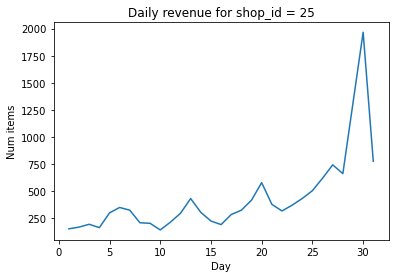

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [20]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

In [21]:
ta5.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31],
           dtype='int64', name='day')

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [22]:
STUDENT_EMAIL = 'christian.gebbe@gmail.com'
STUDENT_TOKEN = 'jd0BDAFKNGcKHjUU'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [23]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)